# Unconstrained Minimization 
This notebook steps through the unconstrained minimization example given in [Lecture #1](https://ocw.mit.edu/courses/16-323-principles-of-optimal-control-spring-2008/resources/lec1/), which seeks to minimize the Rosenbrock Function, a common test function for minimization algorithms. Recall that the Rosenbrock Function, $F: \mathbb{R}^2 \rightarrow \mathbb{R}$, is given as follows: 

$$ F(x_1, x_2) := 100(x_1^2 - x_2)^2 + (1 - x_1)^2 $$

A simple implementation of this function is given below: 

In [57]:
def rosenbrock(x : list) -> float:    
    """ Implementation of the Rosenbrock Function """
    return 100*(x[0]**2 - x[1])**2 + (1 - x[0])**2 

Let us plot the Rosenbrock funcion on the domain $[-100,100) \times [100,100)$ using `matplotlib.pyplot`: 

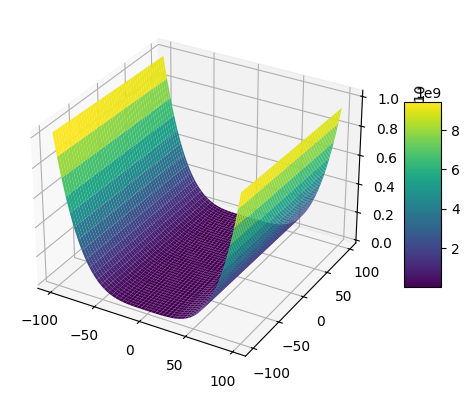

In [58]:
import numpy as np 
import matplotlib.pyplot as plt 

from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection":"3d"}) 

# Specify the domain 
x_1 = np.arange(-100, 100, 1) 
x_2 = np.arange(-100, 100, 1) 
x_1, x_2 = np.meshgrid(x_1, x_2) 

# Evaluate function on domain 
y = rosenbrock([x_1, x_2]) 

# Plot the Rosenbrock surface
surf = ax.plot_surface(x_1, x_2, y, cmap=cm.viridis, linewidth=0, antialiased=True)

# Add a color bar and plot 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


To minimize this function, we use `scipy.optimize.minimize` with the following two methods: 

* BFGS (`method=BFGS`)
* Conjugate Gradient (`method=CG`) 

Indeed, as done in the Lecture Notes, we shall retain $x_0 := [-1.9, 2]$ as our initial guess vector. We first minimize with BFGS: 

In [59]:
from scipy.optimize import minimize

x0  = [-1.9, 2]

# Minimize using BFGS method 
res = minimize(rosenbrock, x0, method='BFGS', options={'gtol': 1e-6, 'disp' : True})

print("Minimum Computed:")
print(res.x)


         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 249
         Gradient evaluations: 79
Minimum Computed:
[0.99999837 0.99999652]


/home/bavoci/.local/lib/python3.10/site-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In examining the above output and ignoring our current floating point precision, we find that the BFGS method converges to the known global minumum $x^* = [1, 1]$ in 32 iterations, with 249 function evaluations, and 79 gradient evaluations. We now minimize using the Conjugate Gradient Method: 

In [60]:
# Minimuze using CG method 
res = minimize(rosenbrock, x0, method='CG', options={'gtol': 1e-6, 'disp' : True})

print("Minimum Computed:")
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 255
         Gradient evaluations: 85
Minimum Computed:
[0.99999552 0.99999104]


Once again examining the above output and ignoring our current floating point precision, we see that the CG method converges to the same global minimum with a comparable number of iterations (32), function evaluations (255), and gradient evaluations (85). Thus, overall, the BFGS and CG methods offer similar performance, with BFGS only marginally outperforming CG. 